### 1. Import and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

In [2]:
df = pd.read_csv("../data/chess_games_feature.csv")
df.head()

,WhiteElo,BlackElo,ResultNumeric,EventTypeID,RatingDiff,AvgRating,WhiteIsHigherRated,WhiteRatingAdvantage,ECOID,w_material_early,...,w_castled_early,b_castled_early,w_checks_early,b_checks_early,early_checks,w_piece_activity,b_piece_activity,both_castled_early,total_captures_early,activity_diff
0,2504,2371,2,0,133,2437.5,1,133,0,34.0,...,1.0,1.0,0.0,0.0,0.0,41.0,39.0,1,6.0,2.0
1,2487,2596,1,0,109,2541.5,0,-109,0,20.0,...,1.0,1.0,1.0,1.0,2.0,33.0,31.0,1,13.0,2.0
2,2915,2921,1,0,6,2918.0,0,-6,0,32.0,...,1.0,1.0,0.0,0.0,0.0,31.0,37.0,1,6.0,-6.0
3,2542,2433,2,0,109,2487.5,1,109,10,26.0,...,1.0,0.0,1.0,0.0,1.0,34.0,28.0,0,7.0,6.0
4,2473,2658,0,0,185,2565.5,0,-185,0,28.0,...,1.0,1.0,3.0,0.0,3.0,30.0,35.0,1,9.0,-5.0


### 2. Prepare data

In [3]:
X = df.drop('ResultNumeric', axis=1)
y = df['ResultNumeric']

print(f"Features: {X.shape}")
print(f"Target: {y.shape}")

Features: (3031382, 33)
Target: (3031382,)


### 3. Train test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,        # 20% for testing
    random_state=42,
    stratify=y
)

### 4. Train model

In [5]:
dt_model = DecisionTreeClassifier(
    max_depth=20,              # Same as Random Forest for fair comparison
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [6]:
start_time = time.time()

dt_model.fit(X_train, y_train)

training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

Training completed in 46.67 seconds (0.78 minutes)


### 5. Evaluate

In [7]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)\n")

print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=['Black Win', 'Draw', 'White Win']))

Accuracy: 0.5751 (57.51%)

Classification Report: 

              precision    recall  f1-score   support

   Black Win       0.55      0.59      0.57    249346
        Draw       0.72      0.28      0.40     81759
   White Win       0.58      0.65      0.61    275172

    accuracy                           0.58    606277
   macro avg       0.62      0.51      0.53    606277
weighted avg       0.59      0.58      0.57    606277



### 6. Confusion Matrix

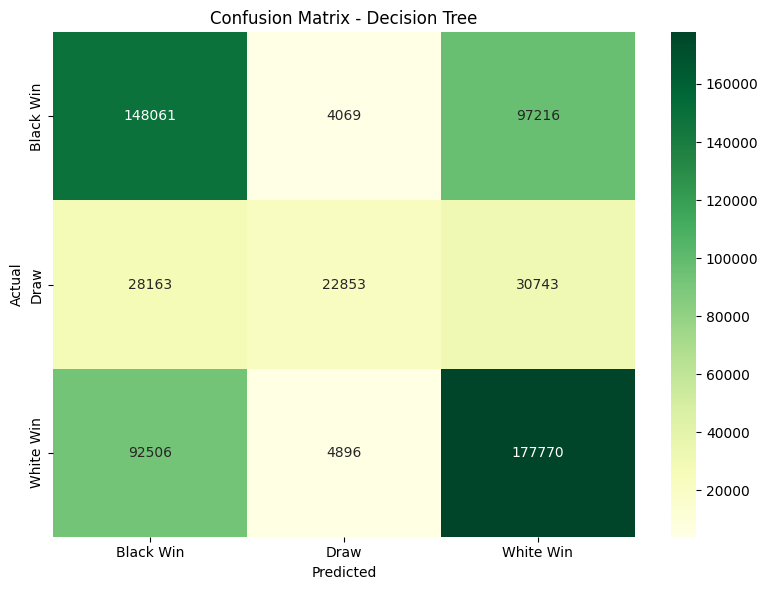

In [8]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGn',
            xticklabels=['Black Win', 'Draw', 'White Win'],
            yticklabels=['Black Win', 'Draw', 'White Win'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

### 7. Feature Importance


Feature Importance:
                  Feature  Importance
6    WhiteRatingAdvantage    0.294880
4               AvgRating    0.249250
10    material_diff_early    0.063884
32          activity_diff    0.049641
3              RatingDiff    0.037255
0                WhiteElo    0.036069
1                BlackElo    0.034168
2             EventTypeID    0.020059
29       b_piece_activity    0.019628
28       w_piece_activity    0.018697
9        b_material_early    0.018261
8        w_material_early    0.017702
7                   ECOID    0.016898
19            center_diff    0.009790
16  aggression_diff_early    0.009537
22       development_diff    0.008701
15     b_aggression_early    0.008492
14     w_aggression_early    0.007920
18       b_center_control    0.007639
21          b_development    0.007636
17       w_center_control    0.007570
20          w_development    0.006847
13     capture_diff_early    0.006533
27           early_checks    0.006415
31   total_captures_early    

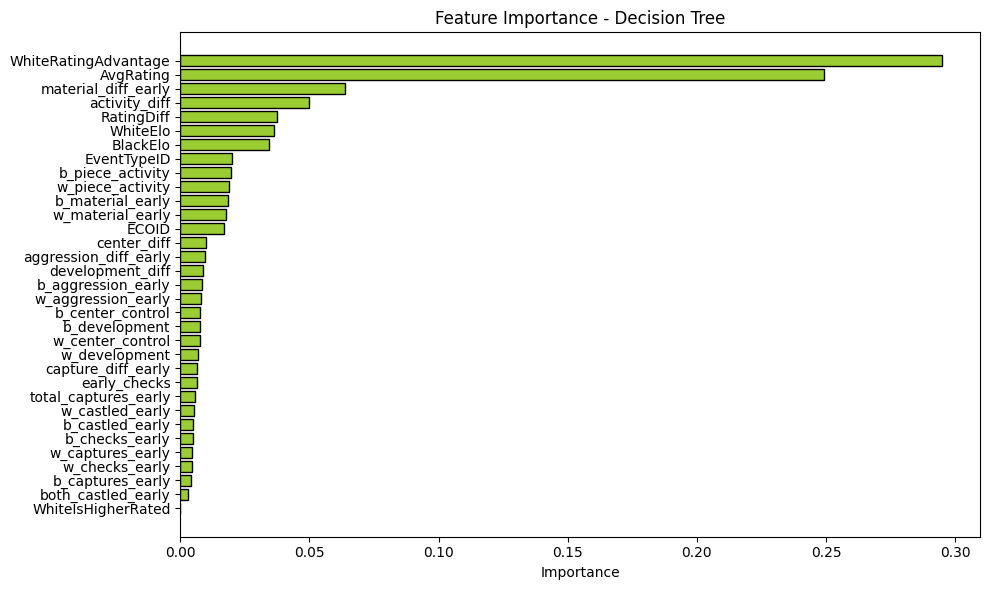

In [9]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'],
         color='yellowgreen', edgecolor='black')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()